In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import gml

In [2]:
#Input files
cluster_fp = "cluster.tsv"
graph_fp = "graph.gml" 

In [3]:
#Get the node that includes the desired protein
def get_node_by_protein(protein, cluster_tsv):
    cluster_df = pd.read_csv(cluster_tsv, sep="\t", header=None, colnames=["Node", "Protein"])
    cluster_df = cluster_df[cluster_df["Protein"] == protein]
    return cluster_df["Node"].values[0]

def get_node_neighborhood(graph_gml, node):
    G = nx.read_gml(graph_gml)
    return list(G.neighbors(node))

def output_cosmograph_tsv(cluster_tsv, graph_gml, protein):
    node = get_node_by_protein(protein, cluster_tsv)
    neighborhood = get_node_neighborhood(graph_gml, node)
    neighborhood.append(node)
    with open("cosmograph.tsv", "w") as f:
        f.write("Node\tProtein\n")
        for n in neighborhood:
            f.write(f"{n}\t{protein}\n")

In [31]:
#Read in graph!
G = gml.read_gml('../data/test_data/test_GRAPH_Guaymas2020_hottest_clu30.gml')

In [12]:
# G.edges

In [13]:
# dir(G)

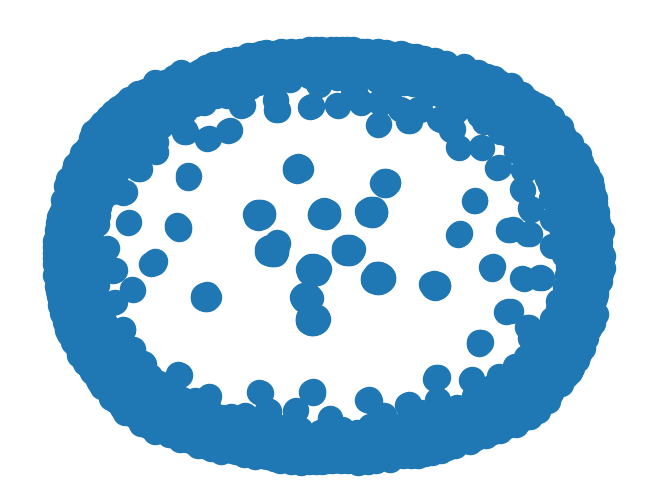

In [32]:
nx.draw(G)

In [ ]:
'D4998_C1112_H1-scaffold_17552_2'

In [43]:
# G.nodes
import numpy as np

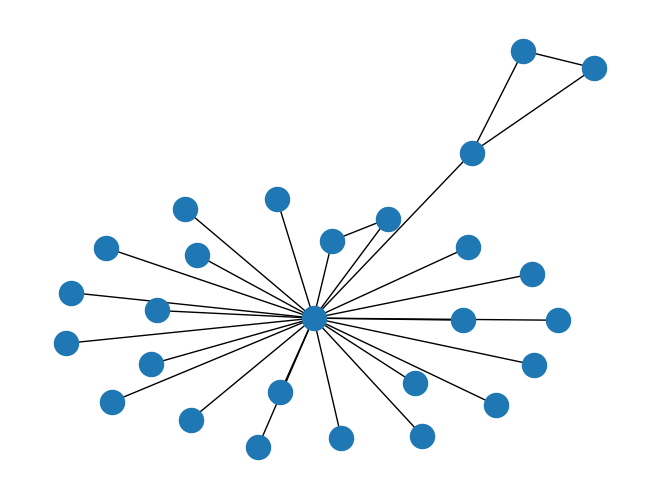

In [53]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
nx.draw(Gcc)

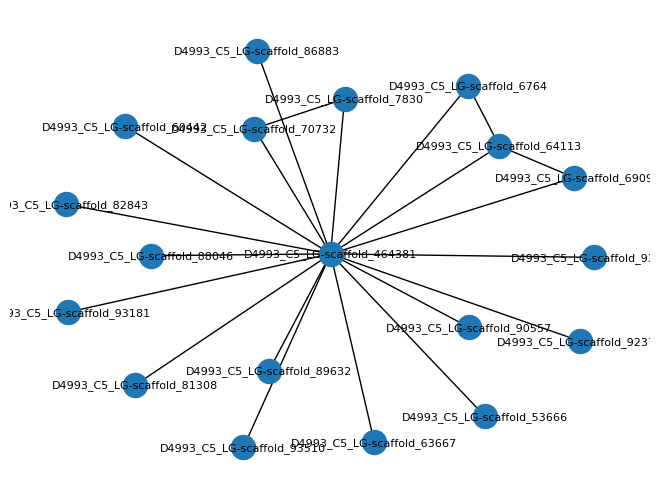

In [65]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[4])
nx.draw(Gcc,with_labels = True, font_size = 8)

In [60]:
Gcc.nodes

NodeView(('D4993_C5_H4-scaffold_98958', 'D4993_C5_H4-scaffold_16088', 'D4993_C5_H4-scaffold_27429', 'D4993_C5_H4-scaffold_69791', 'D4993_C5_H3-scaffold_12374', 'D4993_C5_H4-scaffold_46920', 'D4993_C5_H3-scaffold_12377', 'D4993_C5_H4-scaffold_30275', 'D4993_C5_H4-scaffold_32231', 'D4993_C5_H4-scaffold_57986', 'D4993_C5_H4-scaffold_89062', 'D4993_C5_H4-scaffold_130116', 'D4993_C5_H4-scaffold_78314', 'D4993_C5_H4-scaffold_8733', 'D4993_C5_H4-scaffold_97317', 'D4993_C5_H4-scaffold_86625', 'D4993_C5_H4-scaffold_81938', 'D4993_C5_H4-scaffold_66797', 'D4993_C5_H4-scaffold_61058', 'D4993_C5_H4-scaffold_91979', 'D4993_C5_H4-scaffold_60828', 'D4993_C5_H4-scaffold_26065', 'D4993_C5_H4-scaffold_68469', 'D4993_C5_H4-scaffold_65067', 'D4993_C5_H4-scaffold_73824', 'D4993_C5_H4-scaffold_86803', 'D4993_C5_H4-scaffold_44467'))

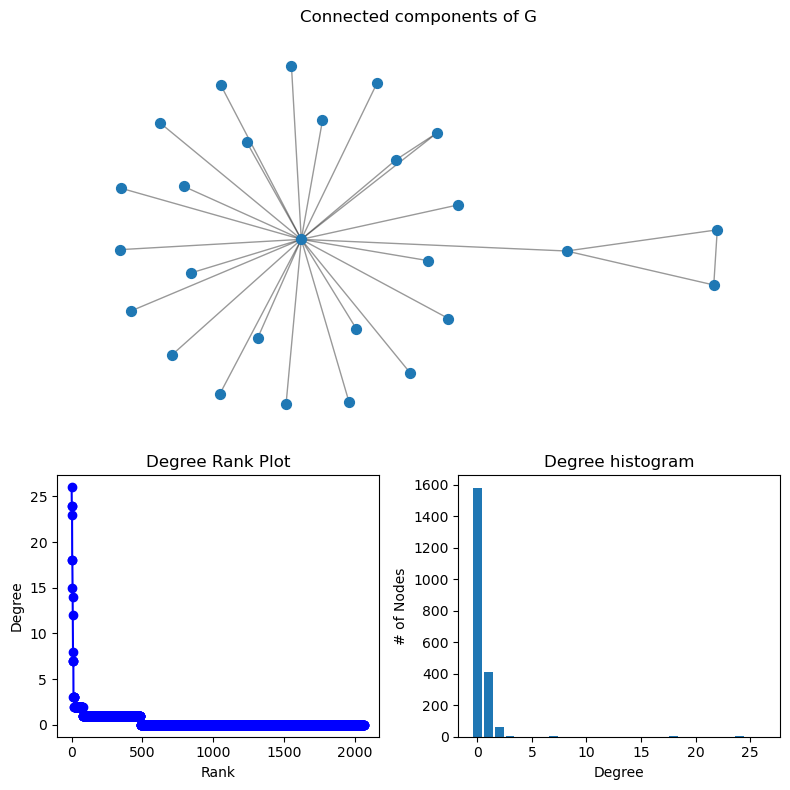

In [59]:
#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=50, )
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [36]:
result = pd.DataFrame()
result['degree'] = degree_sequence
result['rank'] = range(0,len(degree_sequence))

In [45]:
result.value_counts('degree')
#see if we can find node names for these

degree
0     1580
1      409
2       59
3        6
7        3
18       2
24       2
8        1
12       1
14       1
15       1
23       1
26       1
dtype: int64

In [68]:
from pyvis.network import Network

In [76]:
# Plot with pyvis
net = Network(
    directed = True,
    select_menu = True, # Show part 1 in the plot (optional)
    filter_menu = True, # Show part 2 in the plot (optional)
)
net.show_buttons() # Show part 3 in the plot (optional)
net.from_nx(G) # Create directly from nx graph
net.show('test.html',notebook=False)

test.html


<Axes: xlabel='rank', ylabel='degree'>

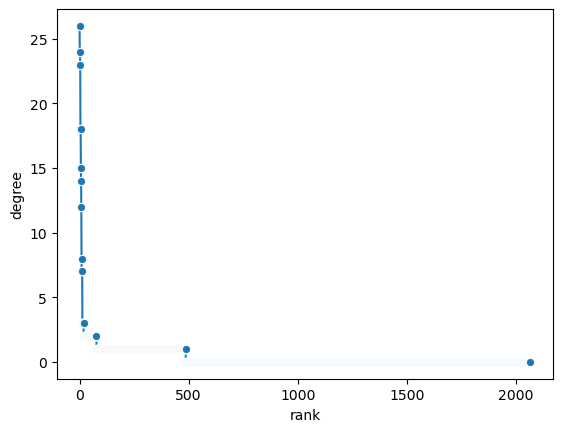

In [40]:
import seaborn as sns
sns.lineplot(
data = result,
x = 'rank',
y = 'degree',
marker = 'o')

In [22]:
#Get me an ego graph!!
Guapo_G = nx.ego_graph(G, 'D4998_C1112_H1-scaffold_17552_2', radius=4)

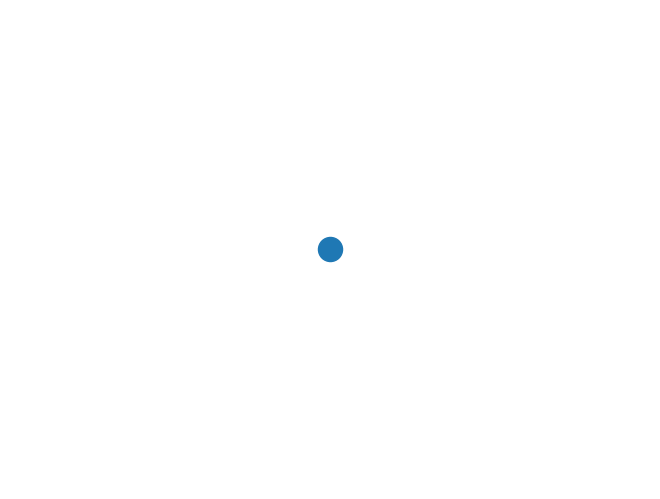

In [23]:
nx.draw(Guapo_G)

In [ ]:
#Write out smol graph to tsvs for cosmograph! 
output_nodes_tsv = 'data/GuaPO_clu30_nodes.tsv'
output_edges_tsv = 'data/GuaPO_clu30_edges.tsv'

with open(output_nodes_tsv, 'w') as node_file:
    node_file.write("NodeId\tlabel\n")  # Modify based on your node attributes
    for node, data in Guapo_G.nodes(data=True):
        # Write node and attributes to the file, ensure attributes match what's in your graph
        node_file.write(f"{node}\t{data.get('label', '')}\n")
print(f'saved nodes to {output_nodes_tsv}')
# Open a file to write the edge data
with open(output_edges_tsv, 'w') as edge_file:
    edge_file.write("Source\tTarget\tWeight\n")  # Modify if you have different or additional attributes
    for source, target, data in Guapo_G.edges(data=True):
        # Write edge and attributes to the file, ensure attributes match what's in your graph
        edge_file.write(f"{source}\t{target}\t{data.get('weight', '')}\n")
print(f'saved edges to {output_edges_tsv}')

Code snippet to make a shuffled fasta for making the test set: 

In [1]:
from Bio import SeqIO
import random

# Load your FASTA file
file_path = '../data/All_Asgards_042423.faa'

# Read all sequences into a list
records = list(SeqIO.parse(file_path, 'fasta'))

# Shuffle the list of records
random.shuffle(records)

# Write the shuffled records to a new file
shuffled_file_path = 'shuffled.fasta'
with open(shuffled_file_path, 'w') as output_handle:
    SeqIO.write(records, output_handle, 'fasta')


In [ ]:
data/graphs/updated_All_Asgards_042423.gml